In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
ipl_df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [3]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
ipl_df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021], dtype=int64)

In [6]:
ipl_df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

## Why are there 6 unique innings? Let's find out

In [7]:
ipl_df['innings'].value_counts()

1    107663
2    100217
3    77    
4    72    
5    8     
6    4     
Name: innings, dtype: int64

In [8]:
ipl_df[ipl_df['innings'] == 6]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
187731,1216517,2020,2020-10-18,Dubai International Cricket Stadium,6,0.4,Kings XI Punjab,Mumbai Indians,MA Agarwal,CH Gayle,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187733,1216517,2020,2020-10-18,Dubai International Cricket Stadium,6,0.3,Kings XI Punjab,Mumbai Indians,MA Agarwal,CH Gayle,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187734,1216517,2020,2020-10-18,Dubai International Cricket Stadium,6,0.2,Kings XI Punjab,Mumbai Indians,CH Gayle,MA Agarwal,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187736,1216517,2020,2020-10-18,Dubai International Cricket Stadium,6,0.1,Kings XI Punjab,Mumbai Indians,CH Gayle,MA Agarwal,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There is only one instance of a sixth innings, which was played between Kings XI Punjab and Mumbai Indians on 18th Oct. 2020 where only 4 bowls were bowled. Could be that it was a super over and it was a 2nd innings of that super over which KXIP won in just 4 balls. Let's find out the 1st innings of that super over.

In [9]:
ipl_df['start_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 208041 entries, 0 to 208040
Series name: start_date
Non-Null Count   Dtype 
--------------   ----- 
208041 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [10]:
ipl_df[ipl_df['start_date'] == '2020-10-18']['batting_team'].unique()

array(['Mumbai Indians', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

### From the above result it is clear that it was a double header on 18th Oct.

In [11]:
ipl_df[ipl_df['innings'] == 5]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
187737,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.7,Mumbai Indians,Kings XI Punjab,KA Pollard,SA Yadav,CJ Jordan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187738,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.6,Mumbai Indians,Kings XI Punjab,KA Pollard,HH Pandya,CJ Jordan,1,0,NaN,NaN,NaN,NaN,NaN,run out,HH Pandya,NaN,NaN
187739,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.5,Mumbai Indians,Kings XI Punjab,KA Pollard,HH Pandya,CJ Jordan,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187740,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.4,Mumbai Indians,Kings XI Punjab,KA Pollard,HH Pandya,CJ Jordan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187741,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.3,Mumbai Indians,Kings XI Punjab,HH Pandya,KA Pollard,CJ Jordan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187742,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.2,Mumbai Indians,Kings XI Punjab,HH Pandya,KA Pollard,CJ Jordan,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187743,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.1,Mumbai Indians,Kings XI Punjab,KA Pollard,HH Pandya,CJ Jordan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187744,1216517,2020,2020-10-18,Dubai International Cricket Stadium,5,0.8,Mumbai Indians,Kings XI Punjab,KA Pollard,SA Yadav,CJ Jordan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> We were right. There is only one instance of a 5th innings. It was indeed a super over between KXIP and MI. MI scored 11 runs which KXIP chased down in just 4 bowls in the 6th innings of that day

In [12]:
ipl_df[(ipl_df['start_date'] == '2020-10-18') & (ipl_df['innings'] == 1)]['batting_team'].unique()

array(['Mumbai Indians', 'Kolkata Knight Riders'], dtype=object)

In [13]:
ipl_df[(ipl_df['start_date'] == '2020-10-18') & (ipl_df['innings'] == 2)]['batting_team'].unique()

array(['Kings XI Punjab', 'Sunrisers Hyderabad'], dtype=object)

### There were two matches, one between `MI` and `KXIP` and other between `KKR` and `SRH`. It is clear that in our dataset the first innings of both the matches is counted as 1 and the second innings of both matches as 2. This means if there would be a `super over` then it's first and second innings would be 3 and 4 in our dataset. Even if we had two matches and in both the matches there was a super over Max innings for that day would still be 4 but we have 5 and 6 innings for this particular day. Why is that so?

<b>It must be because one of the super over got tied and we had a 2nd super over for that same match

### Ideed. When we google the match of 18th Oct 2020. We found out that the game between KXIP and MI required a second Super Over after the first Super Over ended in a tie. Earlier there was a super over between KKR and SRH which KKR won.

### We will only consider innings 1 and 2, this is crucial becase a `Super Over` is not considered part of the main match, so the runs scored and wickets taken by cricketers within them is not added to their career statistics.

In [14]:
df = ipl_df[(ipl_df['innings'] == 1) | (ipl_df['innings'] == 2)]

In [15]:
df['innings'].unique()

array([2, 1], dtype=int64)

In [16]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

<b> Let's find out the names of both the players in our dataset. We know AB De Villiers played for RCB and Jasprit Bumrah played for MI. Let's get the name of every player that has bowled in any of the matches for MI and every player that ever came out to bat for RCB. By this we can see by what names both are players are mentioned in our dataset

In [17]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

player 1: JJ Bumrah

In [18]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

player 2: AB de Villiers

<h3> Let's Analyze AB's overall stats

In [19]:
AB_df = df[df['striker'] == 'AB de Villiers']

In [20]:
AB_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
4575,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,14.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,MS Gony,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4578,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.3,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4579,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.4,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4581,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4587,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,16.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Muralitharan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
AB = AB_df.groupby('season').agg({'runs_off_bat' : sum, 'ball' : len}).rename(columns={'runs_off_bat' : 'Total Runs Scored', 'ball' : 'Total Balls Faced'})

In [22]:
AB.reset_index(inplace=True)
AB

,season,Total Runs Scored,Total Balls Faced
0,2008,95,100
1,2009,465,359
2,2010,111,123
3,2011,312,248
4,2012,319,203
5,2013,360,222
6,2014,395,255
7,2015,513,302
8,2016,687,415
9,2017,216,171


In [23]:
AB['Strike Rate'] = AB['Total Runs Scored'] / AB['Total Balls Faced'] * 100
AB

,season,Total Runs Scored,Total Balls Faced,Strike Rate
0,2008,95,100,95.000000
1,2009,465,359,129.526462
2,2010,111,123,90.243902
3,2011,312,248,125.806452
4,2012,319,203,157.142857
5,2013,360,222,162.162162
6,2014,395,255,154.901961
7,2015,513,302,169.867550
8,2016,687,415,165.542169
9,2017,216,171,126.315789


In [24]:
dismisssals_per_season = df[df['player_dismissed'] == 'AB de Villiers'].groupby('season').agg({'player_dismissed' : len}).reset_index()

In [25]:
dismisssals_per_season.rename(columns={'player_dismissed' : 'No. of. times got out'}, inplace=True)
dismisssals_per_season

,season,No. of. times got out
0,2008,5
1,2009,9
2,2010,7
3,2011,9
4,2012,8
5,2013,10
6,2014,11
7,2015,11
8,2016,13
9,2017,8


In [26]:
AB = pd.concat([AB, dismisssals_per_season['No. of. times got out']], axis = 1)
AB.head()

,season,Total Runs Scored,Total Balls Faced,Strike Rate,No. of. times got out
0,2008,95,100,95.000000,5
1,2009,465,359,129.526462,9
2,2010,111,123,90.243902,7
3,2011,312,248,125.806452,9
4,2012,319,203,157.142857,8


In [27]:
AB['Batting Average'] = AB['Total Runs Scored'] / AB['No. of. times got out']
AB

,season,Total Runs Scored,Total Balls Faced,Strike Rate,No. of. times got out,Batting Average
0,2008,95,100,95.000000,5,19.000000
1,2009,465,359,129.526462,9,51.666667
2,2010,111,123,90.243902,7,15.857143
3,2011,312,248,125.806452,9,34.666667
4,2012,319,203,157.142857,8,39.875000
5,2013,360,222,162.162162,10,36.000000
6,2014,395,255,154.901961,11,35.909091
7,2015,513,302,169.867550,11,46.636364
8,2016,687,415,165.542169,13,52.846154
9,2017,216,171,126.315789,8,27.000000


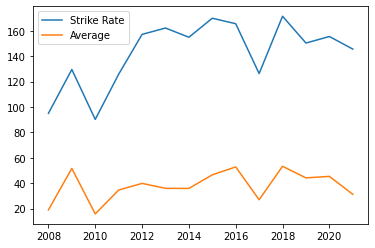

In [28]:
plt.plot(AB['season'], AB['Strike Rate'], label='Strike Rate')
plt.plot(AB['season'], AB['Batting Average'], label='Average')
plt.legend()
plt.show()

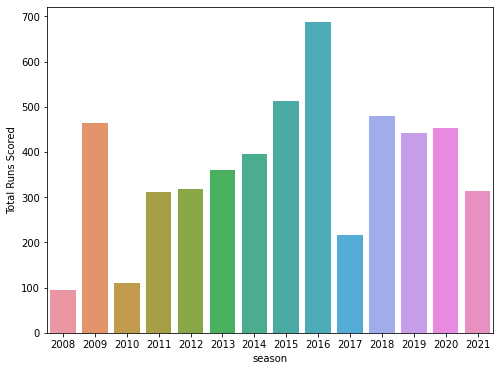

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='Total Runs Scored', data=AB)
plt.show()

In [30]:
AB_vs_bowlers = AB_df.groupby('bowler').agg({'runs_off_bat' : sum, 'ball' : len}).rename(columns={'runs_off_bat' : 'Total Runs Scored',
                                                                                          'ball' : 'Total Balls Faced'})

In [31]:
AB_vs_bowlers.head()

,Total Runs Scored,Total Balls Faced
bowler,,
A Ashish Reddy,46,18
A Chandila,26,11
A Flintoff,34,12
A Kumble,39,41
A Mishra,40,37


In [32]:
AB_vs_bowlers['Strike Rate'] = AB_vs_bowlers['Total Runs Scored'] / AB_vs_bowlers['Total Balls Faced'] * 100
AB_vs_bowlers.sort_values(by=['Total Runs Scored', 'Strike Rate'], ascending=False).head(10)

,Total Runs Scored,Total Balls Faced,Strike Rate
bowler,,,
JJ Bumrah,125,86,145.348837
SL Malinga,124,64,193.750000
RA Jadeja,111,93,119.354839
Harbhajan Singh,110,81,135.802469
Sandeep Sharma,107,57,187.719298
HH Pandya,88,39,225.641026
AD Russell,87,39,223.076923
S Nadeem,77,56,137.500000
DJ Bravo,72,47,153.191489


### AB has scored the maximun runs against Jasprit Bumrah in his whole IPL Career. Let's see how much runs Bumrah Conceded against various players and where does AB stands in that list.

In [33]:
Bumrah_df = df[df['bowler'] == 'JJ Bumrah']
Bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76628,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.5,Royal Challengers Bangalore,Mumbai Indians,KB Arun Karthik,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76629,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.4,Royal Challengers Bangalore,Mumbai Indians,KK Nair,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,KK Nair,NaN,NaN
76630,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.3,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76631,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.2,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
bdf1 = Bumrah_df.groupby('striker')['runs_off_bat'].sum().reset_index()
bdf1.head()

,striker,runs_off_bat
0,A Mishra,1
1,AB de Villiers,125
2,AD Nath,4
3,AD Russell,51
4,AJ Finch,24


In [35]:
bdf2 = Bumrah_df.groupby('striker')['ball'].count().reset_index()
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,86
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [36]:
Bumrah_vs_batsman = pd.merge(bdf1, bdf2)
Bumrah_vs_batsman.rename(columns={'runs_off_bat' : 'Runs', 'ball' : 'Balls'}, inplace=True)
Bumrah_vs_batsman.head()

,striker,Runs,Balls
0,A Mishra,1,5
1,AB de Villiers,125,86
2,AD Nath,4,4
3,AD Russell,51,41
4,AJ Finch,24,29


In [37]:
Bumrah_vs_batsman['Batsman Strike Rate'] = Bumrah_vs_batsman['Runs'] / Bumrah_vs_batsman['Balls'] * 100
Bumrah_vs_batsman.head()

,striker,Runs,Balls,Batsman Strike Rate
0,A Mishra,1,5,20.000000
1,AB de Villiers,125,86,145.348837
2,AD Nath,4,4,100.000000
3,AD Russell,51,41,124.390244
4,AJ Finch,24,29,82.758621


In [38]:
Bumrah_vs_batsman.sort_values(by = ['Runs', 'Batsman Strike Rate'], ascending=False).head(10)

,striker,Runs,Balls,Batsman Strike Rate
158,V Kohli,126,85,148.235294
1,AB de Villiers,125,86,145.348837
78,KL Rahul,111,87,127.586207
128,S Dhawan,95,77,123.376623
68,JP Duminy,70,33,212.121212
141,SPD Smith,68,57,119.298246
92,MK Pandey,61,33,184.848485
143,SS Iyer,59,40,147.500000
49,F du Plessis,58,34,170.588235
96,MS Dhoni,56,58,96.551724


### Jasprit Bumrah has conceded most runs against Virat Kohli followed by AB De Villiers.

### AB seems to be the clear winner of this face off. We don't really focus on Batting or Bowling averages in T20s that much as we do in Tests and ODIs but let's just consider that as well and find out how many times Bumrah dismissed AB.

In [39]:
no_times_dismissed = df[df['bowler'] == 'JJ Bumrah'].groupby('player_dismissed')[['match_id']].count().reset_index().rename(columns={"player_dismissed" : "striker", "match_id" : "No of times dismissed"})

In [40]:
no_times_dismissed.head()

,striker,No of times dismissed
0,A Mishra,1
1,AB de Villiers,3
2,AD Russell,3
3,AJ Finch,1
4,AJ Turner,1


In [41]:
Bumrah_vs_batsman = pd.merge(Bumrah_vs_batsman, no_times_dismissed, how='left').fillna(0)
Bumrah_vs_batsman.sort_values(by='No of times dismissed', ascending = False).head(10)

,striker,Runs,Balls,Batsman Strike Rate,No of times dismissed
124,RR Pant,47,43,109.302326,6.0
52,GJ Maxwell,44,39,112.820513,5.0
37,DJ Bravo,34,23,147.826087,4.0
127,Rashid Khan,3,7,42.857143,4.0
158,V Kohli,126,85,148.235294,4.0
96,MS Dhoni,56,58,96.551724,3.0
142,SR Watson,25,34,73.529412,3.0
1,AB de Villiers,125,86,145.348837,3.0
87,MA Agarwal,6,14,42.857143,3.0
95,MP Stoinis,14,22,63.636364,3.0


### Bumrah has dismissed AB 3 times in the IPL history

In [42]:
Bumrah_vs_batsman.head()

,striker,Runs,Balls,Batsman Strike Rate,No of times dismissed
0,A Mishra,1,5,20.000000,1.0
1,AB de Villiers,125,86,145.348837,3.0
2,AD Nath,4,4,100.000000,0.0
3,AD Russell,51,41,124.390244,3.0
4,AJ Finch,24,29,82.758621,1.0


In [43]:
# considering only 30 balls faced
Bumrah_vs_batsman = Bumrah_vs_batsman[Bumrah_vs_batsman['Balls'] >= 30].reset_index(drop=True)

In [44]:
len(Bumrah_vs_batsman)

28

In [45]:
scatter_kws = ['orangered' if striker == 'AB de Villiers' else 'lightgray'
               for striker in Bumrah_vs_batsman.striker]

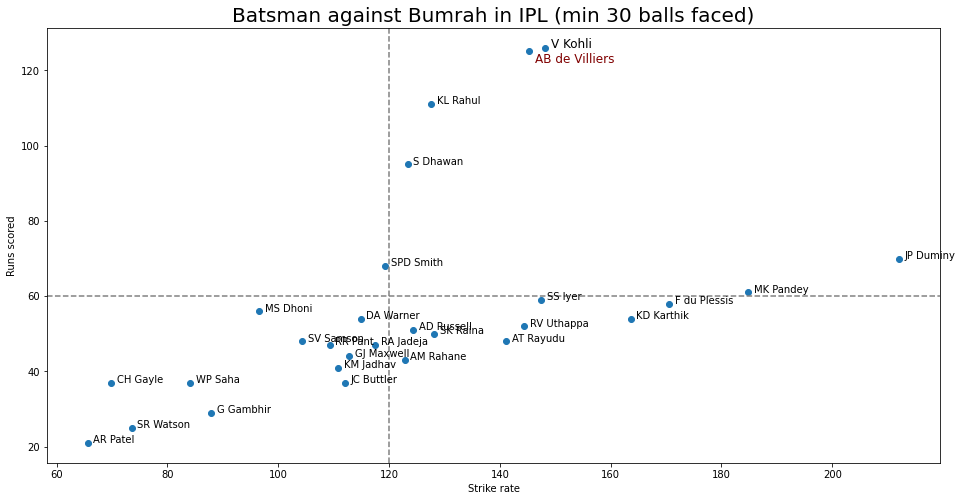

In [46]:
plt.figure(figsize = (16, 8))
plt.scatter(Bumrah_vs_batsman['Batsman Strike Rate'], Bumrah_vs_batsman['Runs'])

for striker in Bumrah_vs_batsman['striker']:
#     plt.text(x, y, text)
    if striker == 'V Kohli':
        plt.text(Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Batsman Strike Rate'] + 1, 
             Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Runs'],
             striker, fontsize='large')
    elif striker == 'AB de Villiers':
        plt.text(Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Batsman Strike Rate'] + 1, 
             Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Runs'] - 3,
             striker, fontsize='large', color = 'maroon')
    else:
        plt.text(Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Batsman Strike Rate'] + 1, 
             Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Runs'],
             striker)
    
plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('Batsman against Bumrah in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

In [47]:
Bumrah_vs_batsman.sort_values(by='Runs', ascending=False).head(10)

,striker,Runs,Balls,Batsman Strike Rate,No of times dismissed
26,V Kohli,126,85,148.235294,4.0
0,AB de Villiers,125,86,145.348837,3.0
13,KL Rahul,111,87,127.586207,2.0
20,S Dhawan,95,77,123.376623,1.0
11,JP Duminy,70,33,212.121212,1.0
22,SPD Smith,68,57,119.298246,3.0
15,MK Pandey,61,33,184.848485,0.0
24,SS Iyer,59,40,147.500000,1.0
7,F du Plessis,58,34,170.588235,0.0
16,MS Dhoni,56,58,96.551724,3.0


In [48]:
# fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}

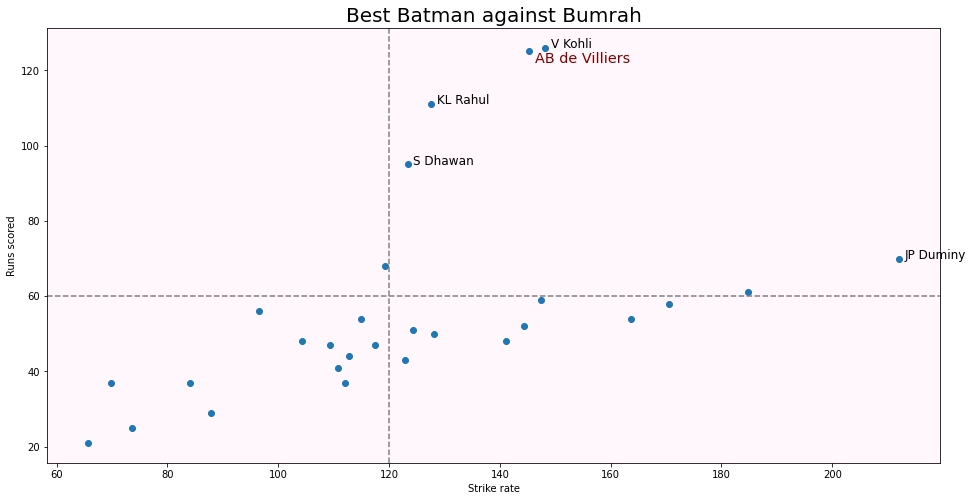

In [49]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(Bumrah_vs_batsman['Batsman Strike Rate'], Bumrah_vs_batsman['Runs'])

for striker in Bumrah_vs_batsman['striker']:
#     plt.text(x, y, text)
    if striker == 'AB de Villiers':
        plt.text(Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Batsman Strike Rate'] + 1, 
             Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Runs'] - 3,
             striker, fontsize='x-large', color = 'maroon')
   
    elif striker == 'V Kohli' or striker == 'S Dhawan' or striker == 'KL Rahul' or striker == 'JP Duminy':
        plt.text(Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Batsman Strike Rate'] + 1, 
             Bumrah_vs_batsman[Bumrah_vs_batsman['striker'] == striker]['Runs'],
             striker, fontsize='large')


plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("Best Batman against Bumrah", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part1.jpg')
plt.show()

In [50]:
# min cirteria : 30 balls

In [51]:
AB_vs_bowlers = AB_vs_bowlers[AB_vs_bowlers['Total Balls Faced'] >= 30].reset_index()
AB_vs_bowlers.head()

,bowler,Total Runs Scored,Total Balls Faced,Strike Rate
0,A Kumble,39,41,95.121951
1,A Mishra,40,37,108.108108
2,AD Russell,87,39,223.076923
3,AR Patel,71,70,101.428571
4,B Kumar,68,43,158.139535


In [52]:
AB_vs_bowlers.sort_values(['Total Runs Scored', 'Strike Rate'], ascending=False).head(10)

,bowler,Total Runs Scored,Total Balls Faced,Strike Rate
14,JJ Bumrah,125,86,145.348837
30,SL Malinga,124,64,193.750000
24,RA Jadeja,111,93,119.354839
9,Harbhajan Singh,110,81,135.802469
33,Sandeep Sharma,107,57,187.719298
8,HH Pandya,88,39,225.641026
2,AD Russell,87,39,223.076923
27,S Nadeem,77,56,137.500000
6,DJ Bravo,72,47,153.191489
5,CH Morris,71,35,202.857143


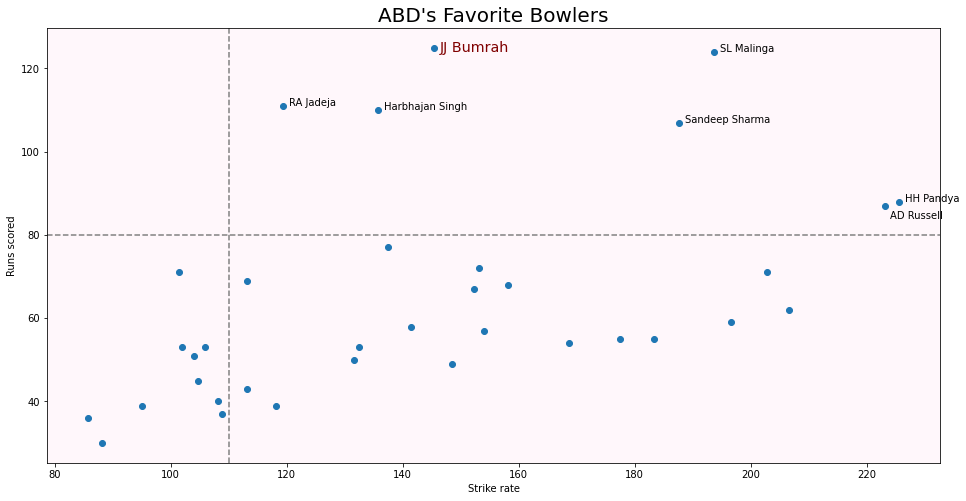

In [53]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(AB_vs_bowlers['Strike Rate'], AB_vs_bowlers['Total Runs Scored'])

for bowler in AB_vs_bowlers['bowler']:
#     plt.text(x, y, text)
    if bowler == 'JJ Bumrah':
        plt.text(AB_vs_bowlers[AB_vs_bowlers['bowler'] == bowler]['Strike Rate'] + 1, 
             AB_vs_bowlers[AB_vs_bowlers['bowler'] == bowler]['Total Runs Scored'] - 1,
             bowler, fontsize='x-large', color = 'maroon')
   
    elif bowler == 'RA Jadeja' or bowler == 'SL Malinga' or bowler == 'Sandeep Sharma' or bowler == 'Harbhajan Singh' or bowler == 'HH Pandya':
        plt.text(AB_vs_bowlers[AB_vs_bowlers['bowler'] == bowler]['Strike Rate'] + 1, 
             AB_vs_bowlers[AB_vs_bowlers['bowler'] == bowler]['Total Runs Scored'],
             bowler)
    elif bowler == 'AD Russell':
        plt.text(AB_vs_bowlers[AB_vs_bowlers['bowler'] == bowler]['Strike Rate'] + 1, 
             AB_vs_bowlers[AB_vs_bowlers['bowler'] == bowler]['Total Runs Scored'] - 3,
             bowler)


plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part2.jpg')
plt.show()

### Winner of this face off is AB De Villiers

<img src='AB.webp'>